# **CVPS20 // Image Thresholding and Object Detection**

Sep 10, 2020

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio

plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

---

### Global Image Thresholding

Let's read in our astro image again, convert to float, and extract the individual color channels,

In [2]:
# -- load image and convert to float
fname = "https://www.nasa.gov/sites/default/files/styles/full_width/public/thumbnails/image/ngc6357_0.jpg"
img = np.asarray(iio.imread(fname)) / 255.

# -- extract color channels
red, grn, blu = img.transpose(2, 0, 1)

Notice that the channels are very morphologically distinct,

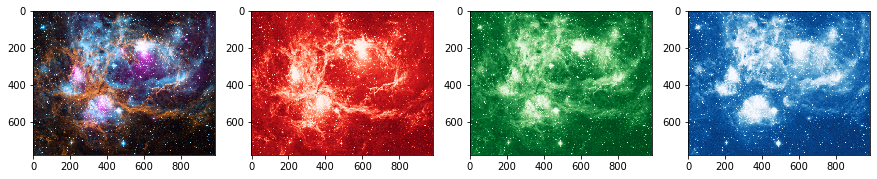

In [3]:
# -- imshow the three channels separately
fig, ax = plt.subplots(1, 4, figsize=(15, 7))
ax[0].imshow(img)
ax[1].imshow(red, cmap = 'Reds_r')
ax[2].imshow(grn, cmap = 'Greens_r')
ax[3].imshow(blu, cmap = 'Blues_r')

Also remember the following from the `cvps20_python_intro.ipynb` notebook,

In [4]:
# -- create numpy array
my_array = np.array()
print(my_array <= -2)

TypeError: ignored

This is an example of **thresholding** a 1D array, and it works in 2D as well:

NameError: ignored

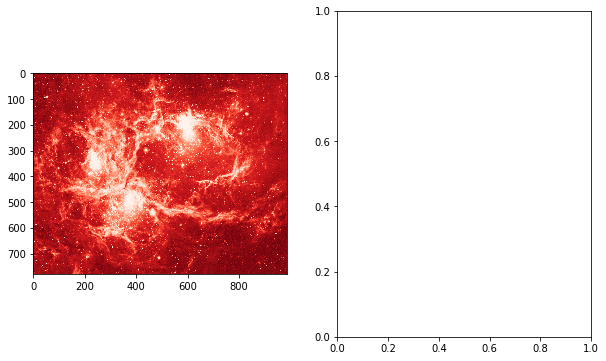

In [5]:
# -- threshold the red channel
fig, ax = plt.subplots(1, 2, figsize = (10,6))
ax[0].imshow(red, 'Reds_r')
ax[1].imshow(red_thr)

This is just a 2D array, and so we can `imshow` it:

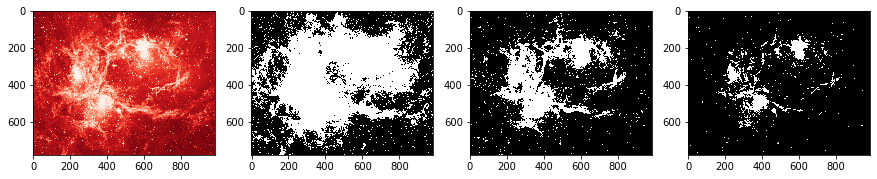

In [8]:
# -- show red channel and thresholded red channel
fig, ax = plt.subplots(1, 4, figsize = (15, 10))
ax[0].imshow(red, 'Reds_r')
ax[1].imshow(red > 0.25)
ax[2].imshow(red > .5)
ax[3].imshow(red > .75)


Given the distribution of red channel brightness values, different thresholds will have different morphological effects,

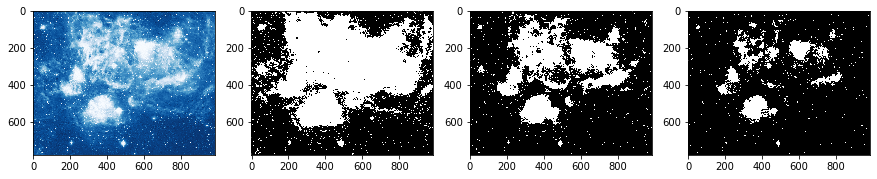

In [10]:
# -- visualize multiple thresholds
fig, ax = plt.subplots(1, 4, figsize = (15, 10))
ax[0].imshow(blu, 'Blues_r')
ax[1].imshow(blu > 0.25)
ax[2].imshow( blu > .5)
ax[3].imshow(blu > .75)

The same goes for the green and blue channels as well,

In [ ]:
# -- visualize multiple thresholds for the blue channel
fig, ax = plt.subplots(1, 4, figsize=(15, 10))


---

### Setting Global Image Thresholds

*How do we choose a "good" threshold value to isolate the pixels we want?*

Let's consider another astronomy image that we saw in the first class,

In [ ]:
# -- read in the Carina Dwarf Galaxy image
fname = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Carina_Dwarf_Galaxy.jpg/1920px-Carina_Dwarf_Galaxy.jpg"
img = iio.imread(fname) / 255.

# -- extract 3 color channels
red, grn, blu = img.transpose(2, 0, 1)

# -- display the image and color channels
fig0, ax0 = plt.subplots()
ax0.imshow(img)
fig.show()

fig1, ax1 = plt.subplots(1, 3)
ax1[0].imshow(red, "Reds_r")
ax1[1].imshow(grn, "Greens_r")
ax1[2].imshow(blu, "Blues_r")

Let's say we want to use the green channel to count the number of objects.  We start by thresholding, but what threshold to choose?  

For example:

In [ ]:
# -- zoom on the image and green channel
fig, ax = plt.subplots(1, 2, figsize=(15, 10))


The histogram of values in the image can give us some clues:

In [ ]:
# -- make a histogram of the green channel values


The `scikit-image` module has a couple of useful functions that we will use, one of which determines the Otsu threshold,

In [ ]:
from skimage.filters import threshold_otsu

# -- find a threshold automatically using Otsu's method


In [ ]:
# -- show the image using Otsu's threshold
fig, ax = plt.subplots(1, 2, figsize=(15, 10))


---

### Counting Objects in Images: Connected-Component Labeling

Now that we have thresholded this image, how many objects are there?  We can count them using "connected-component labeling",

In [ ]:
import scipy.ndimage.measurements as snm

In [ ]:
# -- label the thresholded green channel


In [ ]:
# -- display thresholded image and labels
labs = labs.astype(float) # used to make background black
labs[labs == 0] = np.nan # used to make background black

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(grn_thr)
ax[1].imshow(labs, cmap="spring")
ax[1].set_facecolor("black")

print("approximate number of objects : {0}".format(nlabs))

Let's look at an example with differently sized objects, from `scikit-image`'s example data library,

In [ ]:
from skimage.data import coins as coin_generator

# -- create coins image
coins = 

Let's try to count the number of coins, just as we did before

In [ ]:
# -- calculate the Otsu threshold for the coins
othr_coins = threshold_otsu(coins)

# -- threshold the coins image
coins_thr = coins > othr_coins

# -- label the thresholded image
labs, nlabs = snm.label(coins_thr)

# -- display thresholded image and labels
labs = labs.astype(float)
labs[labs == 0] = np.nan
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(coins_thr)
ax[1].imshow(labs, cmap="spring")
ax[1].set_facecolor("black")

print("approximate number of coins : {0}".format(nlabs))